In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load Flower Dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 16s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

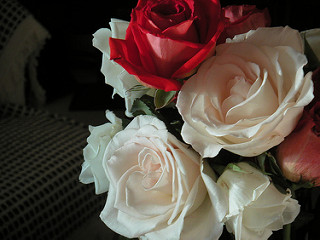

In [8]:
PIL.Image.open(str(roses[1]))

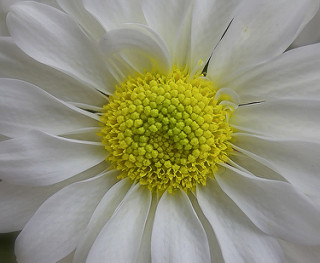

In [10]:
tulips = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Preprocessing: scale images

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Build convolutional neural network and train it

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)        




Epoch 1/30


86/86 [==============================] - 16s 161ms/step - loss: 1.4005 - accuracy: 0.4208
Epoch 2/30
86/86 [==============================] - 13s 151ms/step - loss: 1.0851 - accuracy: 0.5600
Epoch 3/30
86/86 [==============================] - 13s 152ms/step - loss: 0.8932 - accuracy: 0.6664
Epoch 4/30
86/86 [==============================] - 13s 151ms/step - loss: 0.7540 - accuracy: 0.7111
Epoch 5/30
86/86 [==============================] - 13s 151ms/step - loss: 0.5410 - accuracy: 0.8031
Epoch 6/30
86/86 [==============================] - 13s 151ms/step - loss: 0.3440 - accuracy: 0.8772
Epoch 7/30
86/86 [==============================] - 13s 151ms/step - loss: 0.1924 - accuracy: 0.9375
Epoch 8/30
86/86 [==============================] - 13s 150ms/step - loss: 0.1027 - accuracy: 0.9735
Epoch 9/30
86/86 [==============================] - 13s 151ms/step - loss: 0.0817 - accuracy: 0.9771
Epoch 10/30
86/86 [==============================] - 13s 151ms/step - loss: 0.0721 - a

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 62ms/step - loss: 2.6348 - accuracy: 0.6492


[2.6348350048065186, 0.6492374539375305]

#### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.92%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [25]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 64ms/step


array([[ -2.4941106 ,  25.035814  ,   8.414455  , -27.864553  ,
        -14.6644335 ],
       [ 11.125817  ,   0.65957975,  -9.009851  ,  -1.5583    ,
          8.242213  ],
       [ -7.314433  ,   6.486667  ,  14.433812  , -10.188891  ,
         -3.848542  ],
       ...,
       [  6.0456076 ,  -9.317421  ,  -2.9262123 ,   7.0490484 ,
          7.336446  ],
       [ 14.028901  ,   6.032406  , -11.84232   ,  -2.5745685 ,
          0.18481392],
       [  2.1972797 ,  -9.03056   ,   0.53599596,   9.298148  ,
          4.7740555 ]], dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])

In [27]:
np.argmax(score)

1

In [28]:
y_test[0]

1

## Improving Test Accuracy Using Data Augmentation

In [31]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Original Image

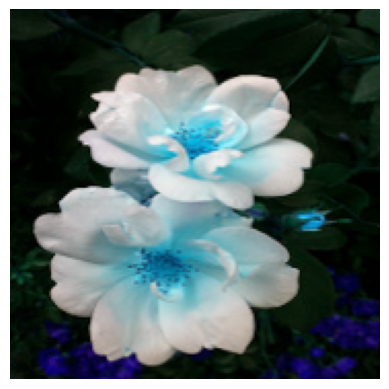

In [34]:
plt.axis('off')
plt.imshow(X[0])

### Newly generated training sample using data augmentation

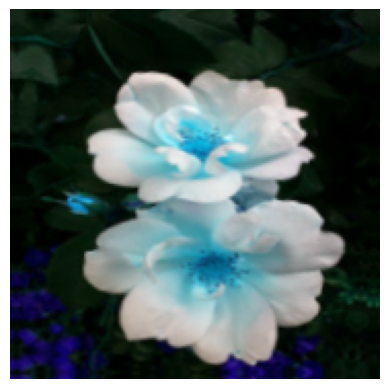

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Train the model using data augmentation and a drop out layer

In [37]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 20s 205ms/step - loss: 1.5374 - accuracy: 0.3245
Epoch 2/30
86/86 [==============================] - 18s 208ms/step - loss: 1.1396 - accuracy: 0.5367
Epoch 3/30
86/86 [==============================] - 19s 221ms/step - loss: 1.0205 - accuracy: 0.5919
Epoch 4/30
86/86 [==============================] - 18s 212ms/step - loss: 0.9584 - accuracy: 0.6294
Epoch 5/30
86/86 [==============================] - 18s 206ms/step - loss: 0.9169 - accuracy: 0.6475
Epoch 6/30
86/86 [==============================] - 18s 206ms/step - loss: 0.8728 - accuracy: 0.6610
Epoch 7/30
86/86 [==============================] - 17s 202ms/step - loss: 0.8057 - accuracy: 0.6857
Epoch 8/30
86/86 [==============================] - 17s 203ms/step - loss: 0.7799 - accuracy: 0.6966
Epoch 9/30
86/86 [==============================] - 17s 200ms/step - loss: 0.7360 - accuracy: 0.7249
Epoch 10/30
86/86 [==============================] - 17s 200ms/step - loss: 0.7196 - accura

In [38]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 42ms/step - loss: 0.9373 - accuracy: 0.7331


[0.9372524619102478, 0.7331154942512512]

#### After using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%